# OYO Corp. VWAP Future Projections

Project Objective:

The project focuses on predicting the VWAP (Volume Weighted Average Price) of a company name Oyo Rooms Corp. based on it's previous seasonality patterns using prior seasonal patterns.


Database Name: OYO ROOM STOCK PRICES
    
Database Source: KAGGLE:- https://www.kaggle.com/datasets/mayankanand2701/oyo-stock-price-dataset/code
            


# Importing important libraries:

In [1]:
import pandas as pd
import numpy as np

In [2]:

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from datetime import timedelta
from time import time

C:\Users\kanis\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import seaborn as sns

In [4]:
sns.set_style('whitegrid')

In [5]:
def parser(s):
    return datetime.strptime(s,'%Y-%m-%d')

In [6]:
# Reading the dataset
OYO_Data = pd.read_csv('OYO Dataset.csv',index_col=0, date_parser=parser)
OYO_Data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-04,895.0,908.0,870.0,875.0,678.447571,70300
2012-01-05,875.0,881.0,863.0,878.0,680.773499,46300
2012-01-06,870.0,877.0,855.0,870.0,674.570618,28800
2012-01-10,871.0,893.0,871.0,884.0,685.425781,65600
2012-01-11,884.0,930.0,879.0,928.0,719.541809,131100
...,...,...,...,...,...,...
2024-05-17,2500.0,2545.0,2480.0,2545.0,2545.000000,23600
2024-05-20,2545.0,2604.0,2545.0,2572.0,2572.000000,27900
2024-05-21,2572.0,2581.0,2507.0,2514.0,2514.000000,23700


# Understanding The Data:-

In [7]:
# Checking the null values in the dataset.
OYO_Data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# Extracting  the descriptive stastics:-
OYO_Data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3.052000e+03
mean,1517.732962,1536.012123,1499.345020,1517.892529,1334.709510,6.238617e+04
std,391.546801,396.643987,386.950559,391.829802,425.808167,6.343266e+04
min,759.000000,767.000000,743.000000,763.000000,591.606079,0.000000e+00
25%,1241.750000,1258.750000,1227.750000,1244.000000,1097.445160,3.190000e+04
50%,1466.000000,1479.000000,1450.000000,1466.000000,1248.018371,4.930000e+04
75%,1721.500000,1745.000000,1705.250000,1727.000000,1429.023407,7.450000e+04
max,2800.000000,2845.000000,2785.000000,2817.000000,2771.138672,1.751800e+06


In [9]:
# Extracting the data type information of dataset:-
OYO_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3052 entries, 2012-01-04 to 2024-05-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3052 non-null   float64
 1   High       3052 non-null   float64
 2   Low        3052 non-null   float64
 3   Close      3052 non-null   float64
 4   Adj Close  3052 non-null   float64
 5   Volume     3052 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 166.9 KB


# Data-cleaning:-

Calculating the volume weighted average price.
VWAP = Cumulative(Volume x Typical Price)/Cumulative(Volume)

Adding the columns for V*P, Total commulative V*P, Total cummulative Volume & VWAP.




In [10]:
# Volume price column
OYO_Data['V*P'] = OYO_Data['Adj Close'] * OYO_Data['Volume']
OYO_Data.head()

,Open,High,Low,Close,Adj Close,Volume,V*P
Date,,,,,,,
2012-01-04,895.0,908.0,870.0,875.0,678.447571,70300,4.769486e+07
2012-01-05,875.0,881.0,863.0,878.0,680.773499,46300,3.151981e+07
2012-01-06,870.0,877.0,855.0,870.0,674.570618,28800,1.942763e+07
2012-01-10,871.0,893.0,871.0,884.0,685.425781,65600,4.496393e+07
2012-01-11,884.0,930.0,879.0,928.0,719.541809,131100,9.433193e+07


In [11]:
# Total cummulative Volume X price column:
OYO_Data['Total VP'] = OYO_Data['V*P'].cumsum()
OYO_Data


,Open,High,Low,Close,Adj Close,Volume,V*P,Total VP
Date,,,,,,,,
2012-01-04,895.0,908.0,870.0,875.0,678.447571,70300,4.769486e+07,4.769486e+07
2012-01-05,875.0,881.0,863.0,878.0,680.773499,46300,3.151981e+07,7.921468e+07
2012-01-06,870.0,877.0,855.0,870.0,674.570618,28800,1.942763e+07,9.864231e+07
2012-01-10,871.0,893.0,871.0,884.0,685.425781,65600,4.496393e+07,1.436062e+08
2012-01-11,884.0,930.0,879.0,928.0,719.541809,131100,9.433193e+07,2.379382e+08
...,...,...,...,...,...,...,...,...
2024-05-17,2500.0,2545.0,2480.0,2545.0,2545.000000,23600,6.006200e+07,2.561729e+11
2024-05-20,2545.0,2604.0,2545.0,2572.0,2572.000000,27900,7.175880e+07,2.562446e+11
2024-05-21,2572.0,2581.0,2507.0,2514.0,2514.000000,23700,5.958180e+07,2.563042e+11


In [12]:
# Total cummulative Volume column:
OYO_Data['Total V'] = OYO_Data['Volume'].cumsum()
OYO_Data.head(5)

,Open,High,Low,Close,Adj Close,Volume,V*P,Total VP,Total V
Date,,,,,,,,,
2012-01-04,895.0,908.0,870.0,875.0,678.447571,70300,4.769486e+07,4.769486e+07,70300
2012-01-05,875.0,881.0,863.0,878.0,680.773499,46300,3.151981e+07,7.921468e+07,116600
2012-01-06,870.0,877.0,855.0,870.0,674.570618,28800,1.942763e+07,9.864231e+07,145400
2012-01-10,871.0,893.0,871.0,884.0,685.425781,65600,4.496393e+07,1.436062e+08,211000
2012-01-11,884.0,930.0,879.0,928.0,719.541809,131100,9.433193e+07,2.379382e+08,342100


In [13]:
# Calculating Volume Weigthed Average Price 
OYO_Data['VWAP'] = OYO_Data['Total VP']/OYO_Data['Total V']
OYO_Data.head(10)

,Open,High,Low,Close,Adj Close,Volume,V*P,Total VP,Total V,VWAP
Date,,,,,,,,,,
2012-01-04,895.0,908.0,870.0,875.0,678.447571,70300,4.769486e+07,4.769486e+07,70300,678.447571
2012-01-05,875.0,881.0,863.0,878.0,680.773499,46300,3.151981e+07,7.921468e+07,116600,679.371160
2012-01-06,870.0,877.0,855.0,870.0,674.570618,28800,1.942763e+07,9.864231e+07,145400,678.420296
2012-01-10,871.0,893.0,871.0,884.0,685.425781,65600,4.496393e+07,1.436062e+08,211000,680.598305
2012-01-11,884.0,930.0,879.0,928.0,719.541809,131100,9.433193e+07,2.379382e+08,342100,695.522284
2012-01-12,943.0,956.0,931.0,939.0,728.070984,85900,6.254130e+07,3.004795e+08,428000,702.054839
2012-01-13,931.0,935.0,913.0,923.0,715.665100,75600,5.410428e+07,3.545838e+08,503600,704.097999
2012-01-16,926.0,990.0,918.0,990.0,767.614807,217000,1.665724e+08,5.211562e+08,720600,723.225320
2012-01-17,1000.0,1027.0,994.0,1017.0,788.549683,184400,1.454086e+08,6.665647e+08,905000,736.535610


In [14]:
# Converting the data into a partular format.


In [15]:
# Creating a data set for model training, testing and validation with the prupose of applying SARIMA model to predict VWAP.
Model_DF = pd.DataFrame(data=OYO_Data['VWAP'])
Model_DF    # Crrating a dataset specifically for modeling and EDA process.

,VWAP
Date,
2012-01-04,678.447571
2012-01-05,679.371160
2012-01-06,678.420296
2012-01-10,680.598305
2012-01-11,695.522284
...,...
2024-05-17,1346.090597
2024-05-20,1346.270294
2024-05-21,1346.415677


In [16]:
# We will be predciting our VWAP based on the 2023 as basis upto May, 2024 
start_date = datetime(2023,1,1) # Start Date 
end_date = datetime(2024,5,23)  # End Date
Stock_Model_DF = Model_DF[start_date:end_date]
Stock_Model_DF

,VWAP
Date,
2023-01-04,1273.112813
2023-01-05,1273.358545
2023-01-06,1273.662728
2023-01-10,1273.902543
2023-01-11,1274.115246
...,...
2024-05-17,1346.090597
2024-05-20,1346.270294
2024-05-21,1346.415677


In [17]:
Stock_Model_DF.astype(int) # Changing the datatype of the database.

,VWAP
Date,
2023-01-04,1273
2023-01-05,1273
2023-01-06,1273
2023-01-10,1273
2023-01-11,1274
...,...
2024-05-17,1346
2024-05-20,1346
2024-05-21,1346


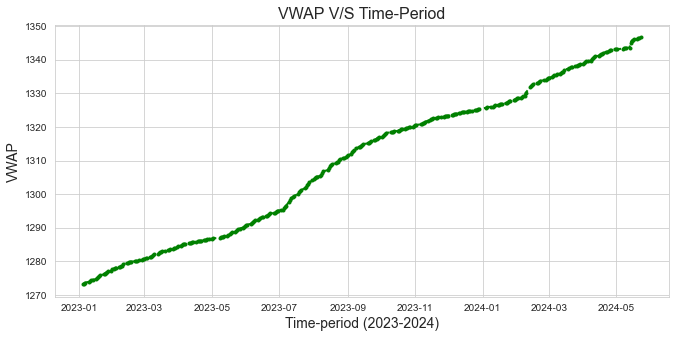

In [58]:
# Plotting the Volume Weighted Average Price
plt.figure(figsize=(11,5))
plt.plot(Stock_Model_DF,'go--', linewidth=2, markersize=3 )
plt.title('VWAP V/S Time-Period', fontsize=16)
plt.xlabel('Time-period (2023-2024)', fontsize=14)
plt.ylabel('VWAP', fontsize=14)
#Showing the plot
plt.show()

# Extracting the trend from the datset.
For this, we will be extracting the difference from the prior month of each year.

In [22]:
# Lag at first difference.
First_Diff = Stock_Model_DF.diff()[1:]

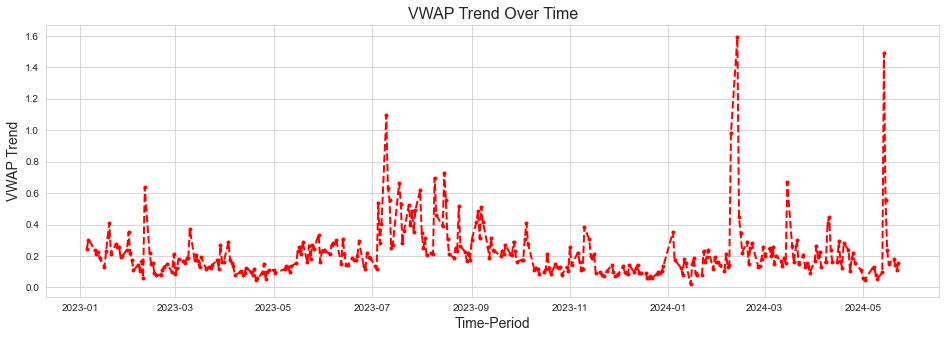

In [26]:
# Plotting the VWAP trend within the dataset.
plt.figure(figsize=(16,5))
plt.plot(First_Diff,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=3)
plt.title('VWAP Trend Over Time', fontsize = 16)
plt.xlabel('Time-Period', fontsize = 14)
plt.ylabel('VWAP Trend', fontsize = 14)
plt.show()

# In every 6 months within a year, there is a repition in the graph series.
# The number of lage to be chosen would be 6

# ACF : Autocorrelation Factor

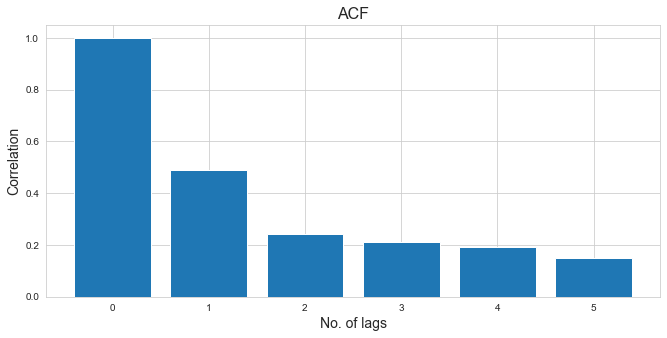

In [29]:
# There are 6 lags within the dataset. 
plt.figure(figsize=(11,5))
acf_vals = acf(First_Diff)
num_lags = 6
plt.bar(range(6),acf_vals[:6])
plt.title('ACF', fontsize=16)
plt.xlabel('No. of lags', fontsize=14)
plt.ylabel('Correlation', fontsize=14)
plt.show()
# Therefore, as the number of lags increases. The Correlation of between y values and the correlation of the lags keeps on decreasing.Which defines a seasonal pattern withn the graph.  
# There would be a seasonal MA process

# PACF : Partial Autocorrelation Factor

Text(0, 0.5, 'Impact of Immediate Lags')

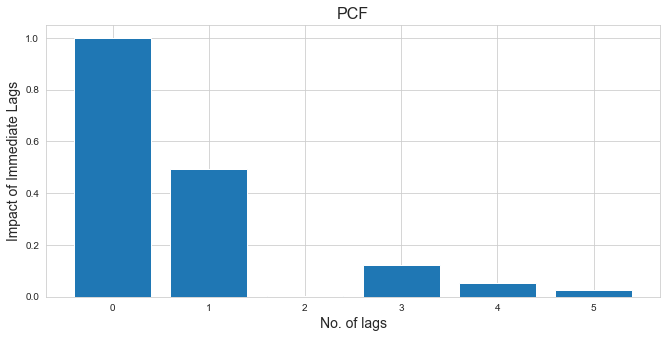

In [33]:
plt.figure(figsize=(11,5))
pacf_vals = pacf(First_Diff)
num_lags =6
plt.bar(range(6),pacf_vals[:6])
plt.title('PCF', fontsize=16)
plt.xlabel('No. of lags', fontsize=14)
plt.ylabel('Impact of Immediate Lags', fontsize=14)
# There is a seasnonal impact of the immediuate on the upcoming lags.
# PACF graph shows a seasonal AR process.


In [34]:
# Getting and training the datasets.

In [35]:
# Timedetla adds the number of days to the current date.
train_end = datetime(2024,4,1)
test_end = datetime(2024,5,23)

train_data = Stock_Model_DF[:train_end]
test_data = Stock_Model_DF[train_end + timedelta(days=1):test_end]

In [36]:
# Fitting the SARIMA model

In [37]:
my_order = (0,1,0) # Regular AR and MA that are non seasnal thre the random walk model.
my_seasonal_order = (1,0,1,12) # Seasonal compnonent and since our data is monthly, threrefore the number of observations we will be having shall be 12.

In [38]:
# Defining the Model:
Model = SARIMAX(train_data,order = my_order, seasonal_order = my_seasonal_order)

C:\Users\kanis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kanis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [39]:
# Fitting the model:
start = time()
model_fit = Model.fit()
end = time()
print('Model Fitting', end - start)

Model Fitting 1.6731541156768799


In [40]:
# Getting the summary of model
print(model_fit.summary())
########### Model Summary:- 
# AIC, BIC & HQIC are low meaning the model is a good fit for the prediction process.


                                      SARIMAX Results                                       
Dep. Variable:                                 VWAP   No. Observations:                  305
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 103.297
Date:                              Mon, 24 Jun 2024   AIC                           -200.594
Time:                                      01:37:05   BIC                           -189.443
Sample:                                           0   HQIC                          -196.133
                                              - 305                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9868      0.011     86.687      0.000       0.965       1.009
ma.S.L12      -0.78

In [41]:
# Getting the model predictions:
predictions = model_fit.forecast(len(test_data))
predictions 

C:\Users\kanis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


305    1338.943711
306    1339.221077
307    1339.531708
308    1339.878976
309    1340.112406
310    1340.286138
311    1340.467892
312    1340.614294
313    1340.770517
314    1340.927890
315    1341.061185
316    1341.216893
317    1341.349613
318    1341.623331
319    1341.929876
320    1342.272577
321    1342.502937
322    1342.674384
323    1342.853748
324    1342.998224
325    1343.152393
326    1343.307695
327    1343.439238
328    1343.592898
329    1343.723873
330    1343.993990
331    1344.296504
332    1344.634698
333    1344.862027
334    1345.031219
335    1345.208225
336    1345.350800
337    1345.502942
338    1345.656202
339    1345.786014
Name: predicted_mean, dtype: float64

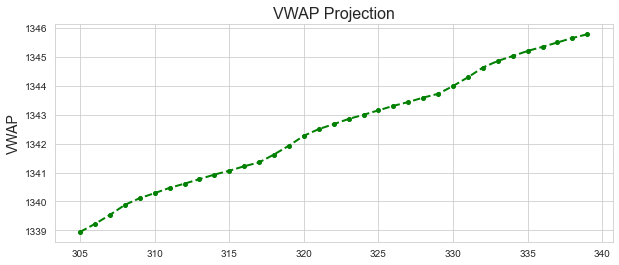

In [53]:
# Plotting the VWAP Projections:-
plt.figure(figsize=(10,4))
plt.plot(predictions, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=4)
plt.title('VWAP Projection',fontsize=16)
plt.ylabel('VWAP',fontsize=14)
plt.show()


# Therefore, VWAP is expected to be decreased to 1345.78 for the next month that i.e. June, 2024.